# Logistic Regression
### Logistic regression is a statistical method used to model the probability of a certain event or outcome occurring (Binary Classification).
*  Discrete output
*  Solve Classification problem
*  Consider as generalized linear model because the outcome depends on the sum of the inputs and parameters

### The Math behind
<img src="Image/Logistic_Regression.JPG"  width="600" height="300">
<img src="Image/Logistic_Regression2.JPG"  width="600" height="300">
<img src="Image/Logistic_Regression3.JPG"  width="600" height="300">

### Difference between Linear Regression and Logistic Regression
<table align="left">
    <tr>
        <td><img src="Image/Logistic_Regression4.JPG" width="300" height="300"></td>
        <td><img src="Image/Logistic_Regression5.JPG" width="300" height="300"></td>
    </tr>
</table>

### Application of Logistic Regression
* Weather Prediction (rain or not)
* Image Categorization (Identifies the different components that are present in the image, and helps categorize them i.e. dog or not a dog, <s>dog or cat</s>)
* Healthcare (Determines the possibility if patient survival, taking age, ISS and RTS into consideration)

### Use case implementation of Logistic Regression - Predicting numbers
<img src="Image/Logistic_Regression6.JPG" width="600" height="300">
<img src="Image/Logistic_Regression7.JPG" width="600" height="300">

### 1. Importing the Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import metrics
from sklearn.datasets import load_digits
%matplotlib inline
digits = load_digits()

### 2. Determining the total number of images and labels

In [2]:
print("Image Data Shape", digits.data.shape)
print("Lable Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Lable Data Shape (1797,)


In [3]:
#Each image is 8x8 which represent the activation of the image
digits.data[0:1]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

### 3. Displaying some of the images and labels

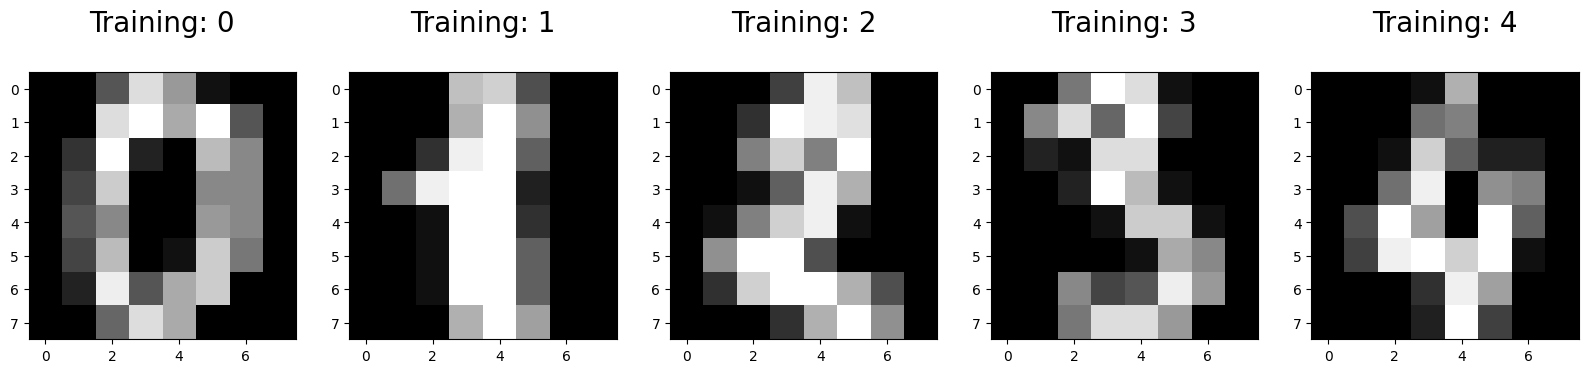

In [4]:
#label/target is 0, 1, 2, 3, ...
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1,5,index+1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

### 4. Diving dataset into Training and Test set

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.23, random_state=2)

In [6]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1383, 64)
(1383,)
(414, 64)
(414,)


### 5. Importing the Logistic Regression model

In [7]:
from sklearn.linear_model import LogisticRegression

### 6. Making an instance of the model and training it

In [8]:
logisticRegr = LogisticRegression(max_iter=3000)
logisticRegr.fit(X_train, y_train)

LogisticRegression(max_iter=3000)

### 7. Prediction the output of the first element of the test set

In [9]:
print(logisticRegr.predict(X_test[0].reshape(1,-1)))

[4]


### 8. Predicting the output of the first 10 elements of the test set

In [10]:
print(logisticRegr.predict(X_test[:10]))

[4 0 9 1 8 7 1 5 1 6]


### 9. Predicting for the entire dataset

In [11]:
y_pred = logisticRegr.predict(X_test)

### 10. Determining the accuracy of the model

In [44]:
# Accuracy score
score = logisticRegr.score(X_test,y_test)
print(score)

0.9492753623188406


### 11. Confusion matrix 

In [13]:
cm = metrics.confusion_matrix(y_test,y_pred)
print(cm)

[[37  0  0  0  1  0  0  0  0  0]
 [ 0 46  0  1  0  0  0  0  1  0]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 39  0  0  0  2  1  0]
 [ 0  0  0  0 34  0  0  0  3  1]
 [ 0  1  0  0  1 43  0  0  0  1]
 [ 0  1  0  0  0  0 39  0  1  0]
 [ 0  0  0  0  0  0  0 45  1  0]
 [ 0  0  0  0  1  0  0  0 36  1]
 [ 0  0  0  1  0  1  0  0  1 31]]


### 12. Representing the confusion matrix in a hear map

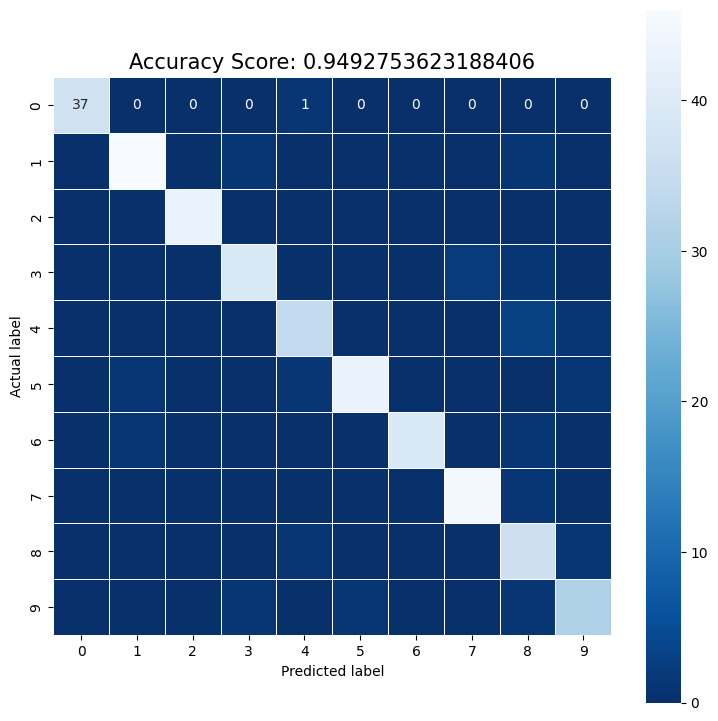

In [78]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt="d", linewidth=.5, square=True, cmap = "Blues_r")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
all_sample_title = "Accuracy Score: {0}".format(score)
plt.title(all_sample_title,size = 15)
plt.show()

### 13. Explanation of Confusion Matrix
<img src="Image/Logistic_Regression8.JPG" width="1200" height="300">

### 14. Prediction

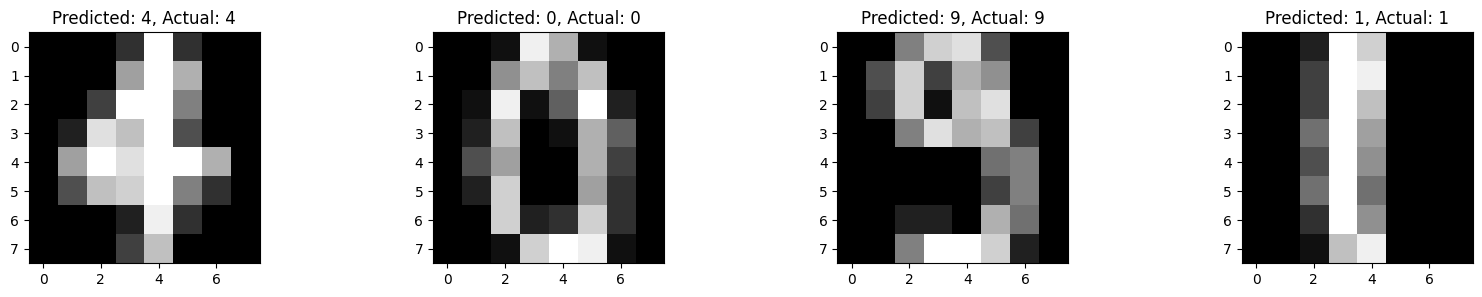

In [19]:
index = 0
classifiedIndex = []
for pred, actual in zip (y_pred, y_test):
    if pred == actual:
        classifiedIndex.append(index)
    index+=1
plt.figure(figsize=(20,3))
for plotIndex, wrong in enumerate(classifiedIndex[0:4]):
    plt.subplot(1,4,plotIndex+1)
    plt.imshow(np.reshape(X_test[wrong], (8,8)), cmap=plt.cm.gray)
    plt.title("Predicted: {}, Actual: {}" .format(y_pred[wrong], y_test[wrong], fontsize=20))

### loss function
The loss function for logistic regression is called the logistic loss or cross-entropy loss. 

It is used to measure the error between the predicted probabilities and the actual binary labels. 

In [27]:
from sklearn.metrics import log_loss
y_prob = logisticRegr.predict_proba(X_test)
log_loss(y_test, y_prob)

0.3032695630496172

In [53]:
from collections import defaultdict

from sklearn.metrics import (
    f1_score,
    log_loss,
    precision_score,
    recall_score,
    roc_auc_score,
)
import pandas as pd

precision_score(y_test, y_pred, average='micro')

0.9492753623188406

In [77]:
scores = defaultdict(list)


scores["log loss"].append(log_loss(y_test, y_prob))
scores["Roc auc"].append(roc_auc_score(y_test, y_prob, multi_class='ovr'))
scores["Accuracy"].append(accuracy_score(y_test, y_pred))

for metric in [precision_score, recall_score, f1_score]:
    score_name = metric.__name__.replace("_", " ").replace("score", "").capitalize()
    scores[score_name].append(metric(y_test, y_pred, average='weighted'))

score_df = pd.DataFrame(scores)
score_df.round(decimals=4)

,log loss,Roc auc,Accuracy,Precision,Recall,F1
0,0.3033,0.9955,0.9493,0.9516,0.9493,0.9498
